<a href="https://colab.research.google.com/github/unitxero/Data_Analysis_MC/blob/main/NYC_311_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
df_311 = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/311_Service_Requests_from_2019May.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"


In [8]:
df_311[['Borough','Agency']].sort_values(by='Borough')

,Borough,Agency
55688,BRONX,DOT
33107,BRONX,HPD
56021,BRONX,DOT
33108,BRONX,HPD
45647,BRONX,NYPD
...,...,...
16692,Unspecified,DOT
12585,Unspecified,DCAS
54364,Unspecified,DOT
5898,Unspecified,HRA


In [9]:
df_311[['Borough','Agency']].sort_values(by='Borough').nunique()

Borough     6
Agency     20
dtype: int64

In [10]:
df_311.shape

(69637, 21)

In [11]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description', 'BBL', 'Borough', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [14]:
df_311.groupby(['Borough'])['Unique Key'].count()

Borough
BRONX            10925
BROOKLYN         22247
MANHATTAN        13133
QUEENS           18623
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

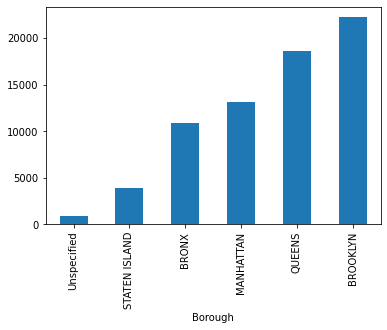

In [15]:
# Grouping dataset by Borough, using Unique Key
# Then sorting the values in ascending order
# we also call a bar chart to be plotted

df_311.groupby(['Borough'])['Unique Key'].count().sort_values(ascending = True).plot(kind = 'bar')

In [17]:
df_borough = df_311.groupby(['Borough'])['Unique Key'].count()

In [18]:
df_borough

Borough
BRONX            10925
BROOKLYN         22247
MANHATTAN        13133
QUEENS           18623
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

In [19]:
type(df_borough)

pandas.core.series.Series

In [20]:
plt.ylabel = 'Frequency'
plt.xlabel = 'Borough'

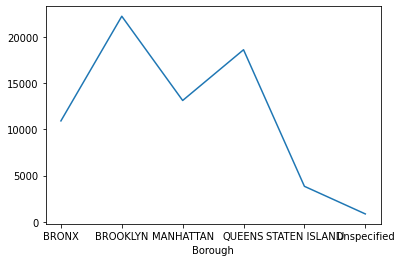

In [22]:
df_borough.plot()

In [24]:
df_311['City']

0        South Ozone Park
1                NEW YORK
2                NEW YORK
3                BROOKLYN
4                 Astoria
               ...       
69632               BRONX
69633       STATEN ISLAND
69634               BRONX
69635            BROOKLYN
69636            BROOKLYN
Name: City, Length: 69637, dtype: object

In [25]:
df_311[['Borough', 'Agency']]

,Borough,Agency
0,QUEENS,DEP
1,MANHATTAN,DOHMH
2,MANHATTAN,DOHMH
3,BROOKLYN,DOHMH
4,QUEENS,DOHMH
...,...,...
69632,BRONX,DOHMH
69633,STATEN ISLAND,DOHMH
69634,BRONX,DOHMH
69635,BROOKLYN,DOHMH


In [26]:
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"


In [28]:
borough_Agency_df = df_311[['Borough', 'Agency', 'Complaint Type']]

borough_Agency_df

,Borough,Agency,Complaint Type
0,QUEENS,DEP,Water System
1,MANHATTAN,DOHMH,Food Poisoning
2,MANHATTAN,DOHMH,Food Poisoning
3,BROOKLYN,DOHMH,Food Poisoning
4,QUEENS,DOHMH,Food Poisoning
...,...,...,...
69632,BRONX,DOHMH,Food Poisoning
69633,STATEN ISLAND,DOHMH,Standing Water
69634,BRONX,DOHMH,Food Poisoning
69635,BROOKLYN,DOHMH,Food Poisoning


In [29]:
borough_Agency_df.head()

,Borough,Agency,Complaint Type
0,QUEENS,DEP,Water System
1,MANHATTAN,DOHMH,Food Poisoning
2,MANHATTAN,DOHMH,Food Poisoning
3,BROOKLYN,DOHMH,Food Poisoning
4,QUEENS,DOHMH,Food Poisoning


In [30]:
column_names = ['Borough', 'Agency', 'Complaint Type', 'Facility Type', 'City', 'Resolution Description']

In [31]:
new_df = df_311[column_names]
new_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
0,QUEENS,DEP,Water System,NaN,South Ozone Park,The Department of Environment Protection inspe...
1,MANHATTAN,DOHMH,Food Poisoning,NaN,NEW YORK,Callers should contact the DOHMH Foodborne Ill...
2,MANHATTAN,DOHMH,Food Poisoning,NaN,NEW YORK,The Department of Health and Mental Hygiene wi...
3,BROOKLYN,DOHMH,Food Poisoning,NaN,BROOKLYN,The Department of Health and Mental Hygiene wi...
4,QUEENS,DOHMH,Food Poisoning,NaN,Astoria,The Department of Health and Mental Hygiene wi...


In [32]:
new_DEP_Agency_df = new_df[new_df['Agency'] == 'DEP']
new_DEP_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
0,QUEENS,DEP,Water System,NaN,South Ozone Park,The Department of Environment Protection inspe...
10,BROOKLYN,DEP,FATF,NaN,BROOKLYN,The Department of Environmental Protection has...
11,BROOKLYN,DEP,Noise,NaN,BROOKLYN,The Department of Environmental Protection did...
24,BRONX,DEP,Noise,NaN,BRONX,The Department of Environmental Protection did...
27,STATEN ISLAND,DEP,Water System,NaN,STATEN ISLAND,The Department of Environmental Protection inv...


In [33]:
df_311.groupby('Agency')['Unique Key'].count().sort_values(ascending = True)

Agency
TAX          6
ACS          8
DOITT       12
DCAS        26
DOE         44
EDC         61
DFTA       226
HRA        238
DCA        385
DHS        476
TLC        761
DOF       1259
DOHMH     1868
DPR       3065
DOB       4150
DEP       5179
DOT       8208
HPD      11215
DSNY     11262
NYPD     21188
Name: Unique Key, dtype: int64

In [34]:
df_agency_count = df_311.groupby(['Agency'])['Unique Key'].count()
df_agency_count

Agency
ACS          8
DCA        385
DCAS        26
DEP       5179
DFTA       226
DHS        476
DOB       4150
DOE         44
DOF       1259
DOHMH     1868
DOITT       12
DOT       8208
DPR       3065
DSNY     11262
EDC         61
HPD      11215
HRA        238
NYPD     21188
TAX          6
TLC        761
Name: Unique Key, dtype: int64

In [36]:
new_HPD_Agency_df = new_df[new_df['Agency'] == 'HPD']
new_HPD_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
13,MANHATTAN,HPD,GENERAL,NaN,NEW YORK,The Department of Housing Preservation and Dev...
14,MANHATTAN,HPD,HEAT/HOT WATER,NaN,NEW YORK,The Department of Housing Preservation and Dev...
22,MANHATTAN,HPD,HEAT/HOT WATER,NaN,NEW YORK,The Department of Housing Preservation and Dev...
25,BRONX,HPD,PAINT/PLASTER,NaN,BRONX,The Department of Housing Preservation and Dev...
40,BRONX,HPD,PAINT/PLASTER,NaN,BRONX,The Department of Housing Preservation and Dev...


In [41]:
new_DOT_Agency_df = new_df[new_df['Agency'] == 'DOT']
new_DOT_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
68,MANHATTAN,DOT,Street Condition,NaN,NEW YORK,The Department of Transportation inspected th...
90,BROOKLYN,DOT,Street Light Condition,NaN,BROOKLYN,Service Request status for this request is ava...
93,QUEENS,DOT,Street Light Condition,NaN,Sunnyside,Service Request status for this request is ava...
96,BROOKLYN,DOT,Traffic Signal Condition,NaN,BROOKLYN,Service Request status for this request is ava...
102,MANHATTAN,DOT,Street Condition,NaN,NEW YORK,The Department of Transportation inspected the...


In [40]:
new_DHS_Agency_df = new_df[new_df['Agency'] == 'DHS']
new_DHS_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
273,QUEENS,DHS,Homeless Person Assistance,NaN,Elmhurst,The individual was found and outreach assistan...
794,MANHATTAN,DHS,Homeless Person Assistance,NaN,NEW YORK,The mobile outreach response team went to the ...
810,MANHATTAN,DHS,Homeless Person Assistance,NaN,NEW YORK,The mobile outreach response team offered serv...
882,BROOKLYN,DHS,Homeless Person Assistance,NaN,BROOKLYN,The mobile outreach response team offered serv...
962,BROOKLYN,DHS,Homeless Person Assistance,NaN,BROOKLYN,The Department of Homeless Services has review...


In [42]:
new_ACS_Agency_df = new_df[new_df['Agency'] == 'ACS']
new_ACS_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
2750,Unspecified,ACS,Forms,NaN,NaN,Your comments have been submitted to the Admin...
15374,Unspecified,ACS,Forms,NaN,NaN,Your comments have been submitted to the Admin...
34317,Unspecified,ACS,Forms,NaN,NaN,Your comments have been submitted to the Admin...
37194,Unspecified,ACS,Forms,NaN,NaN,Your comments have been submitted to the Admin...
40066,Unspecified,ACS,Forms,NaN,NaN,Your comments have been submitted to the Admin...


In [43]:
new_DCA_Agency_df = new_df[new_df['Agency'] == 'DCA']
new_DCA_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
370,BROOKLYN,DCA,Consumer Complaint,NaN,BROOKLYN,The Department of Consumer Affairs has determi...
972,MANHATTAN,DCA,Consumer Complaint,NaN,NEW YORK,The Department of Consumer Affairs mailed you ...
1569,BROOKLYN,DCA,Consumer Complaint,NaN,BROOKLYN,The Department of Consumer Affairs is scheduli...
1785,MANHATTAN,DCA,Consumer Complaint,NaN,NEW YORK,The Department of Consumer Affairs is scheduli...
1794,QUEENS,DCA,Consumer Complaint,NaN,WOODHAVEN,The Department of Consumer Affairs is scheduli...


In [44]:
new_DCAS_Agency_df = new_df[new_df['Agency'] == 'DCAS']
new_DCAS_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
2379,Unspecified,DCAS,Question,NaN,NaN,Your comments have been submitted to the Depar...
8278,Unspecified,DCAS,Question,NaN,NaN,Your comments have been submitted to the Depar...
11690,Unspecified,DCAS,Question,NaN,NaN,Your comments have been submitted to the Depar...
12585,Unspecified,DCAS,Question,NaN,NaN,Your comments have been submitted to the Depar...
17288,Unspecified,DCAS,Question,NaN,NaN,Your comments have been submitted to the Depar...


In [45]:
new_DFTA_Agency_df = new_df[new_df['Agency'] == 'DFTA']
new_DFTA_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
1213,BRONX,DFTA,Housing - Low Income Senior,NaN,BRONX,The Department for the Aging contacted you and...
1518,QUEENS,DFTA,Housing - Low Income Senior,NaN,FRESH MEADOWS,The Department for the Aging contacted you and...
1723,MANHATTAN,DFTA,Housing - Low Income Senior,NaN,NEW YORK,The Department for the Aging contacted you and...
1849,MANHATTAN,DFTA,Housing - Low Income Senior,NaN,NEW YORK,The Department for the Aging contacted you and...
2004,BROOKLYN,DFTA,Housing Options,NaN,BROOKLYN,The Department for the Aging contacted you and...


In [46]:
new_DOB_Agency_df = new_df[new_df['Agency'] == 'DOB']
new_DOB_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
19,BROOKLYN,DOB,General Construction/Plumbing,NaN,BROOKLYN,The Department of Buildings attempted to inves...
41,BROOKLYN,DOB,General Construction/Plumbing,NaN,BROOKLYN,The Department of Buildings attempted to inves...
44,BROOKLYN,DOB,General Construction/Plumbing,NaN,BROOKLYN,The Department of Buildings reviewed this comp...
92,MANHATTAN,DOB,Building/Use,NaN,NEW YORK,The Department of Buildings reviewed this comp...
110,BROOKLYN,DOB,Building/Use,NaN,BROOKLYN,The Department of Buildings attempted to inves...


In [47]:
new_DOE_Agency_df = new_df[new_df['Agency'] == 'DOE']
new_DOE_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
32,QUEENS,DOE,School Maintenance,School,JACKSON HEIGHTS,The Department of Education completed the work...
492,BRONX,DOE,School Maintenance,School,BRONX,The Department of Education completed the work...
818,QUEENS,DOE,School Maintenance,School,ASTORIA,The Department of Education completed the work...
6006,BRONX,DOE,School Maintenance,School,BRONX,The Department of Education completed the work...
13121,BROOKLYN,DOE,School Maintenance,School,BROOKLYN,The Department of Education completed the work...


In [48]:
new_DOF_Agency_df = new_df[new_df['Agency'] == 'DOF']
new_DOF_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
953,BROOKLYN,DOF,DOF Property - Payment Issue,NaN,BROOKLYN,See notes.
983,QUEENS,DOF,DOF Property - Reduction Issue,NaN,FLORAL PARK,See notes.
1068,BROOKLYN,DOF,DOF Property - Reduction Issue,NaN,BROOKLYN,See notes.
1128,QUEENS,DOF,Advocate - Other,NaN,RIDGEWOOD,"The Office of the Taxpayer Advocate, an indepe..."
1192,QUEENS,DOF,DOF Property - Payment Issue,NaN,SAINT ALBANS,The Department of Finance will investigate the...


In [52]:
new_DOHMH_Agency_df = new_df[new_df['Agency'] == 'DOHMH']
new_DOHMH_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
1,MANHATTAN,DOHMH,Food Poisoning,NaN,NEW YORK,Callers should contact the DOHMH Foodborne Ill...
2,MANHATTAN,DOHMH,Food Poisoning,NaN,NEW YORK,The Department of Health and Mental Hygiene wi...
3,BROOKLYN,DOHMH,Food Poisoning,NaN,BROOKLYN,The Department of Health and Mental Hygiene wi...
4,QUEENS,DOHMH,Food Poisoning,NaN,Astoria,The Department of Health and Mental Hygiene wi...
5,MANHATTAN,DOHMH,Food Poisoning,NaN,NEW YORK,The Department of Health and Mental Hygiene wi...


In [53]:
new_DOITT_Agency_df = new_df[new_df['Agency'] == 'DOITT']
new_DOITT_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
1437,QUEENS,DOITT,Public Payphone Complaint,NaN,WHITESTONE,The phone company has already notified the Pub...
14025,MANHATTAN,DOITT,Public Payphone Complaint,NaN,NEW YORK,Both preliminary and follow-up inspections hav...
23435,BROOKLYN,DOITT,Public Payphone Complaint,NaN,BROOKLYN,"After a follow-up inspection, the graffiti/lit..."
24742,BRONX,DOITT,Public Payphone Complaint,NaN,BRONX,Both preliminary and follow-up inspections hav...
26274,MANHATTAN,DOITT,Public Payphone Complaint,NaN,NEW YORK,Both preliminary and follow-up inspections hav...


In [54]:
new_DPR_Agency_df = new_df[new_df['Agency'] == 'DPR']
new_DPR_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
106,BROOKLYN,DPR,Damaged Tree,NaN,BROOKLYN,The Department of Parks and Recreation usually...
245,BROOKLYN,DPR,Dead/Dying Tree,NaN,BROOKLYN,The Department of Parks and Recreation visited...
267,QUEENS,DPR,Dead/Dying Tree,NaN,MASPETH,The Department of Parks and Recreation visited...
271,QUEENS,DPR,New Tree Request,NaN,OZONE PARK,The Department of Parks and Recreation will re...
418,BRONX,DPR,Damaged Tree,NaN,BRONX,The Department of Parks and Recreation has ins...


In [55]:
new_DSNY_Agency_df = new_df[new_df['Agency'] == 'DSNY']
new_DSNY_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
17,MANHATTAN,DSNY,Sanitation Condition,DSNY Garage,NEW YORK,The Department of Sanitation investigated this...
20,BROOKLYN,DSNY,Request Large Bulky Item Collection,NaN,BROOKLYN,NaN
21,MANHATTAN,DSNY,Sanitation Condition,DSNY Garage,NEW YORK,The Department of Sanitation investigated this...
72,BROOKLYN,DSNY,Electronics Waste,NaN,BROOKLYN,The Department of Sanitation did not find any ...
78,MANHATTAN,DSNY,Request Large Bulky Item Collection,NaN,NEW YORK,NaN


In [ ]:
new_EDC_Agency_df = new_df[new_df['Agency'] == 'EDC']